In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("All imports successful")

All imports successful


In [2]:
# FizzBuzz as single returns
for num in range(1,21):
    if (num % 5 == 0) and (num % 3 == 0):
        print(f"{num} = " + "FizzBuzz")
    elif num % 5 == 0:
        print(f"{num} = " + "Buzz")
    elif num % 3 == 0:
        print(f"{num} = " + "Fizz")
    else:
        print(num)

1
2
3 = Fizz
4
5 = Buzz
6 = Fizz
7
8
9 = Fizz
10 = Buzz
11
12 = Fizz
13
14
15 = FizzBuzz
16
17
18 = Fizz
19
20 = Buzz


In [3]:
# FizzBuzz as list
fizz_list = []

for num in range(1,21):
    if (num % 5 == 0) and (num % 3 == 0):
        fizz_list.append("FizzBuzz")
    elif num % 5 == 0:
        fizz_list.append("Buzz")
    elif num % 3 == 0:
        fizz_list.append("Fizz")
    else:
        fizz_list.append(num)
print(fizz_list)

[1, 2, 'Fizz', 4, 'Buzz', 'Fizz', 7, 8, 'Fizz', 'Buzz', 11, 'Fizz', 13, 14, 'FizzBuzz', 16, 17, 'Fizz', 19, 'Buzz']


In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [5]:
print(df.shape)
df.head(3)

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [6]:
df.head(3).T

,0,1,2
MedInc,8.325200,8.301400,7.257400
HouseAge,41.000000,21.000000,52.000000
AveRooms,6.984127,6.238137,8.288136
AveBedrms,1.023810,0.971880,1.073446
Population,322.000000,2401.000000,496.000000
AveOccup,2.555556,2.109842,2.802260
Latitude,37.880000,37.860000,37.850000
Longitude,-122.230000,-122.220000,-122.240000
MedHouseVal,4.526000,3.585000,3.521000


In [7]:
df['income_category'] = np.where(df['MedInc'] > df['MedInc'].median(), 'High', 'Low')

In [8]:
df['income_category'].value_counts()

income_category
High    10320
Low     10320
Name: count, dtype: int64

In [9]:
model = LinearRegression()
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target = 'MedHouseVal'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model.fit(X_train, y_train)
print("Model Trained!")
print(f"X train shape: {X_train.shape}")
print(f"Y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"Y test shape: {y_test.shape}")

Model Trained!
X train shape: (16512, 8)
Y train shape: (16512,)
X test shape: (4128, 8)
Y test shape: (4128,)


In [10]:
predictions = model.predict(X_test)

print(f"Predictions Shape: {predictions.shape}")
print(f"\nFirst 5 Predictions:\n{predictions[:5]}")
print(f"\nFirst 5 Actual:\n{y_test[:5].values}")

Predictions Shape: (4128,)

First 5 Predictions:
[0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]

First 5 Actual:
[0.477   0.458   5.00001 2.186   2.78   ]


In [11]:
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"R2 Score: {r2:.3f}")
print(f"MAE: ${mae:.3f}")
print(f"RMSE: ${rmse:.3f}")

R2 Score: 0.576
MAE: $0.533
RMSE: $0.746


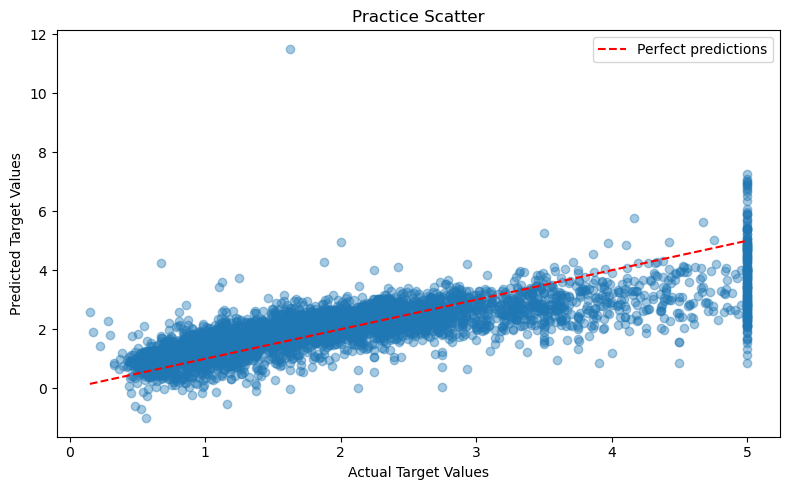

In [12]:
plt.figure(figsize = (8,5))
plt.scatter(y_test, predictions, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect predictions')
plt.title("Practice Scatter")
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
import random

nums = [random.randint(1, 101) for num in range(20)]
print(nums)

[72, 27, 81, 40, 49, 91, 48, 72, 86, 59, 83, 43, 98, 63, 15, 74, 66, 31, 29, 86]


In [14]:
results = []

def roll_die():
    for num in range(20):
        results.append(random.randint(1, 101))
    return print(results)

roll_die()

[36, 68, 11, 100, 85, 56, 75, 39, 29, 3, 61, 56, 93, 60, 76, 96, 68, 75, 94, 8]


In [15]:
chat = f"""
When visiting a casino, I played a dice game.
Each of my rolls were {random.randint(1,7)}, {random.randint(1,7)}, {random.randint(1,7)}, and {random.randint(1,7)}. 
Then I was up $300 and cashed out.
"""

print(chat)


When visiting a casino, I played a dice game.
Each of my rolls were 3, 6, 7, and 7. 
Then I was up $300 and cashed out.

